In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1653252624.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of customers
i_data = pd.DataFrame()
len_ = 100

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]
i_data['Demand'] = [r.random() + r.randrange(50, 100) for _ in range(len_)]

i_data.head(10)

,X,Y,Demand
0,97.959231,58.144851,51.149133
1,-30.846652,40.087183,86.218323
2,88.767788,-20.565257,97.186292
3,-82.893010,70.526550,62.091384
4,-36.851640,28.297480,86.259965
5,15.004803,-32.985962,93.484246
6,-25.874900,-63.903737,97.371373
7,-20.466095,-38.864939,50.038527
8,14.886786,50.155108,59.064108
9,-57.610291,52.447772,64.888262


In [6]:
# create set of candidate locations
j_data = pd.DataFrame()
len_ = 20

j_data['X'] = [rcoord() for _ in range(len_)]
j_data['Y'] = [rcoord() for _ in range(len_)]

j_data.head(10)

,X,Y
0,-29.204613,3.285223
1,-7.215044,24.777846
2,-53.641003,30.318153
3,-29.173518,-18.006279
4,-40.278851,18.122623
5,64.965128,-6.096157
6,-28.063498,-81.908156
7,-56.492352,13.915816
8,74.890065,58.849722
9,22.093676,-9.149705


Text(0.5, 1.0, 'Customer and Facility Locations')

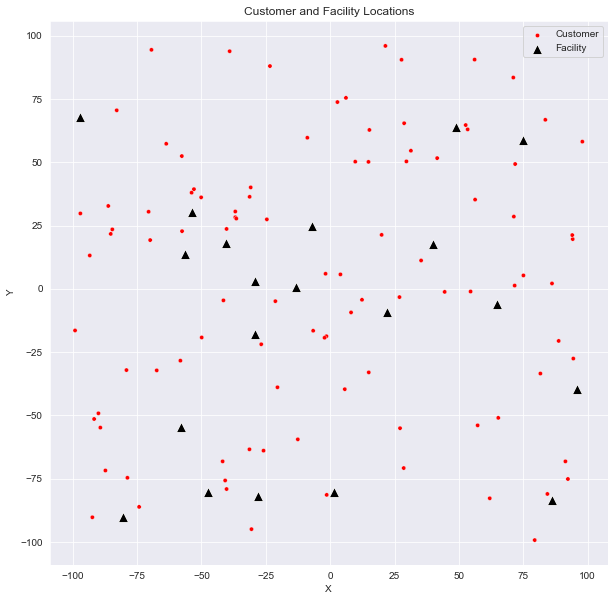

In [7]:
# plot the customers and facilities
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='red', legend=False, label="Customer")
sns.scatterplot(x='X', y='Y', data=j_data, s=100, color='black', marker='^', label="Facility")
plt.legend()
plt.title('Customer and Facility Locations')

In [8]:
# create distance matrix
eucl = lambda x1, y1, x2, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].values
j_loc = j_data[['X', 'Y']].values

dist_ij = np.array([[eucl(i[0],i[1],j[0],j[1]) for j in j_loc] for i in i_loc])
dist_ij

array([[138.49267852, 110.34031435, 154.13291628, ..., 142.14994707, 168.60891305, 195.49750875],
       [ 36.83857417,  28.15721401,  24.79952332, ..., 170.14567023, 124.51094858,  71.96393619],
       [120.35918239, 106.15413776, 151.22627075, ...,  63.00028572, 105.66668101, 205.94332388],
       ...,
       [102.33651654,  71.95982053, 111.71900514, ..., 151.93014169, 153.61368308, 149.99143365],
       [ 91.28597493,  64.37424892, 110.05310256, ..., 122.43833248, 127.74997149, 156.99495213],
       [ 55.30619589,  65.68146965,  91.71681472, ...,  91.59540425,  40.74062334, 148.74416925]])

In [9]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    j_data.to_excel(writer, sheet_name='j_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
